In [ ]:
# Instala ultralytics
%pip install ultralytics
# Importa libreria ultralytics
import ultralytics
# Revisa y visualiza las capacidades computacionales del computador virtual
ultralytics.checks()

Ultralytics YOLOv8.2.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/ProyectoFinal/partiturasmusicales

/content/drive/MyDrive/ProyectoFinal/partiturasmusicales


In [ ]:
!ls

0739a53a74088b2f63ae2d4160dc81d7_png.rf.3a0d7449080a567145719347414ef6c5.jpg  runs   yolov8n.pt
data.yaml								      test   yolov8s.pt
README.dataset.txt							      train
README.roboflow.txt							      valid


In [ ]:
%pip install --upgrade typing_extensions

  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.12.0
    Uninstalling typing_extensions-4.12.0:
      Successfully uninstalled typing_extensions-4.12.0


In [ ]:
%pip install albumentations

In [ ]:
import cv2
import albumentations as A
import os
import shutil

In [ ]:
import os
image_root = '/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/train/images'
labels_root = '/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/train/labels'

a_images = '/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/train/images'
a_labels = '/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/train/labels'

In [ ]:
# Obtener la lista de nombres de archivos en la carpeta de imágenes
image_files = os.listdir(image_root)
# Filtrar solo los archivos de imágenes
image_files = [file for file in image_files if file.lower().endswith(('.jpg', '.jpeg'))]

In [ ]:
image_files[:10] ,len(image_files)

(['scores_416_jpg.rf.04f93782f06700318f1a2756061b4297.jpg',
  'lg-80089604-aug-gutenberg1939-page-1_png.rf.7be0d883bb1b16e0a8513edf70393d89.jpg',
  'lg-533872927082689874-aug-emmentaler-page-8_png.rf.354a9a52246c9e335fd987a9d8023b21.jpg',
  'lg-164599457-aug-emmentaler-page-2_png.rf.f9af241e820cb4f0288aac7f83b78df9.jpg',
  'scores_226_jpg.rf.5e071e076849be8989f76ceb10ec8ed6.jpg',
  'lg-797958438447858728-aug-gutenberg1939-page-4_png.rf.05fab89d1309a814ecfdd4ab867f8f28.jpg',
  'lg-66055864-aug-emmentaler-_png.rf.a626dd5adadd5c7dbe7b2b1bef6f4524.jpg',
  'lg-499826096924778115-aug-beethoven-page-1_png.rf.337aa5dd3e52a322d76761687ec1d153.jpg',
  'lg-94036436-aug-emmentaler-page-12_png.rf.864e020c375e463ca8b34d7f5c00398e.jpg',
  'scores_55_jpg.rf.d0a4bcbfb717087eb8076cf692818594.jpg'],
 1759)

In [ ]:
import os
# reemplaza con la ruta de tu carpeta
num_archivos = len(os.listdir('/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/train/images'))
print('Número de archivos en la carpeta:', num_archivos)

Número de archivos en la carpeta: 1759


In [ ]:
# Loop over each file in the image directory
for i, file in enumerate(image_files):
    # Read the original image
    image = cv2.imread(f"{image_root}/{file}")

    # Define the transformation for both image and labels
    transform = A.Compose([
        A.RandomBrightnessContrast(p=1),
        A.RandomGamma(p=1),
        A.CLAHE(p=1),
    ])

    # Apply the transformation to the image and labels
    augmented = transform(image=image)
    t_image = augmented['image']

    # Save the transformed image
    cv2.imwrite(f'{a_images}/{file[:-4]}-shaper.jpg', t_image)

    # Copy the corresponding text file to the new directory
    shutil.copy(f'{labels_root}/{file[:-4]}.txt', f'{a_labels}/{file[:-4]}-shaper.txt')

    # Define the transformation for both image and labels
    transform = A.Compose([
        A.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.2, hue=0.2,p=0.5),
        A.MotionBlur(blur_limit=33, p=0.1),
        A.GaussNoise(var_limit=(0, 255), p=0.1)
    ])

    # Apply the transformation to the image and labels
    augmented = transform(image=image)
    t_image = augmented['image']

    # Save the transformed image
    cv2.imwrite(f'{a_images}/{file[:-4]}-Channel.jpg', t_image)
    # Copy the corresponding text file to the new directory
    shutil.copy(f'{labels_root}/{file[:-4]}.txt', f'{a_labels}/{file[:-4]}-Channel.txt')

        # Define the transformation for both image and labels
    transform = A.Compose([
        A.CLAHE(p=1),
        A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=50, val_shift_limit=50, p=1),
    ])

    # Apply the transformation to the image and labels
    augmented = transform(image=image)
    t_image = augmented['image']

    # Save the transformed image
    cv2.imwrite(f'{a_images}/{file[:-4]}-Multi.jpg', t_image)

    # Copy the corresponding text file to the new directory
    shutil.copy(f'{labels_root}/{file[:-4]}.txt', f'{a_labels}/{file[:-4]}-Multi.txt')

In [ ]:
import os

# reemplaza con la ruta de tu carpeta
num_archivos = len(os.listdir('/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/train/images'))
print('Número de Imagenes en la carpeta:', num_archivos)

Número de Imagenes en la carpeta: 7036


In [ ]:
# reemplaza con la ruta de tu carpeta
num_archivos = len(os.listdir('/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/train/labels'))
print('Número de Labels en la carpeta:', num_archivos)

Número de Labels en la carpeta: 7036


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/data.yaml epochs=30 imgsz=640 save_period=5

100% 21.5M/21.5M [00:00<00:00, 195MB/s]
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=5, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=F

In [ ]:
!ls /content/drive/MyDrive/Proyecto2versionN/partituras/runs/detect/train/weights

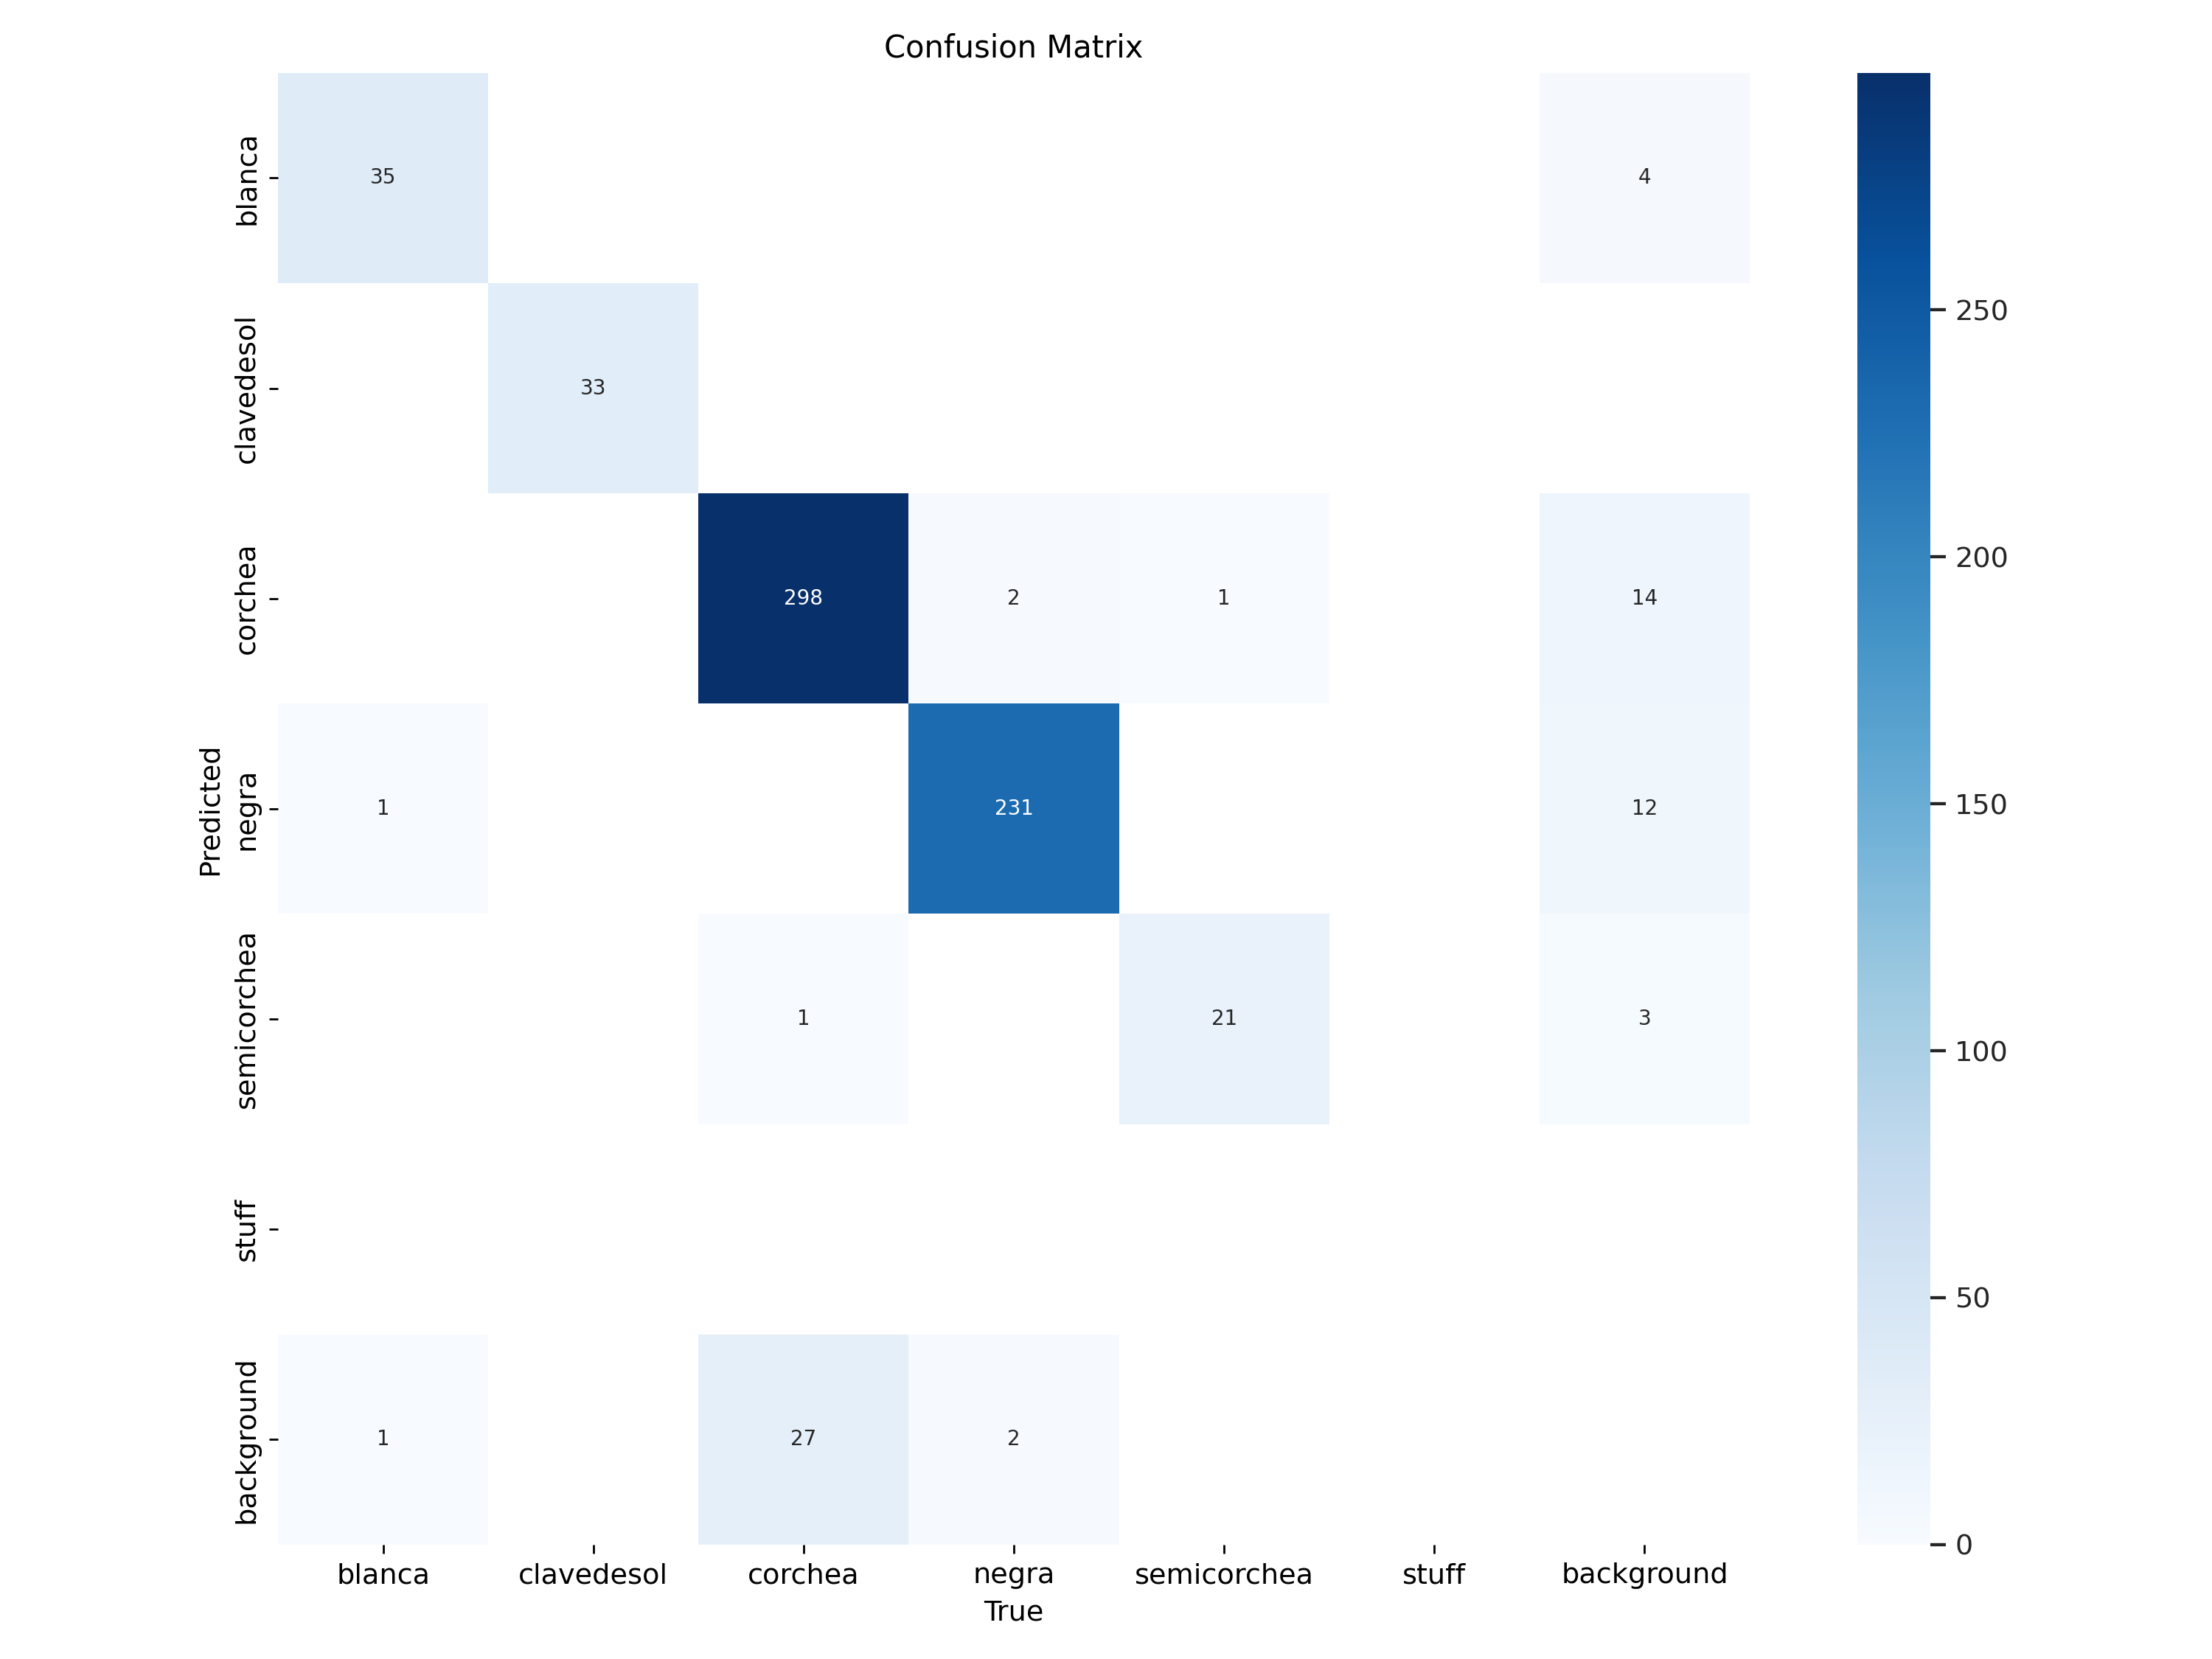

In [ ]:
Image(filename='/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/runs/detect/train/confusion_matrix.png', width=800)

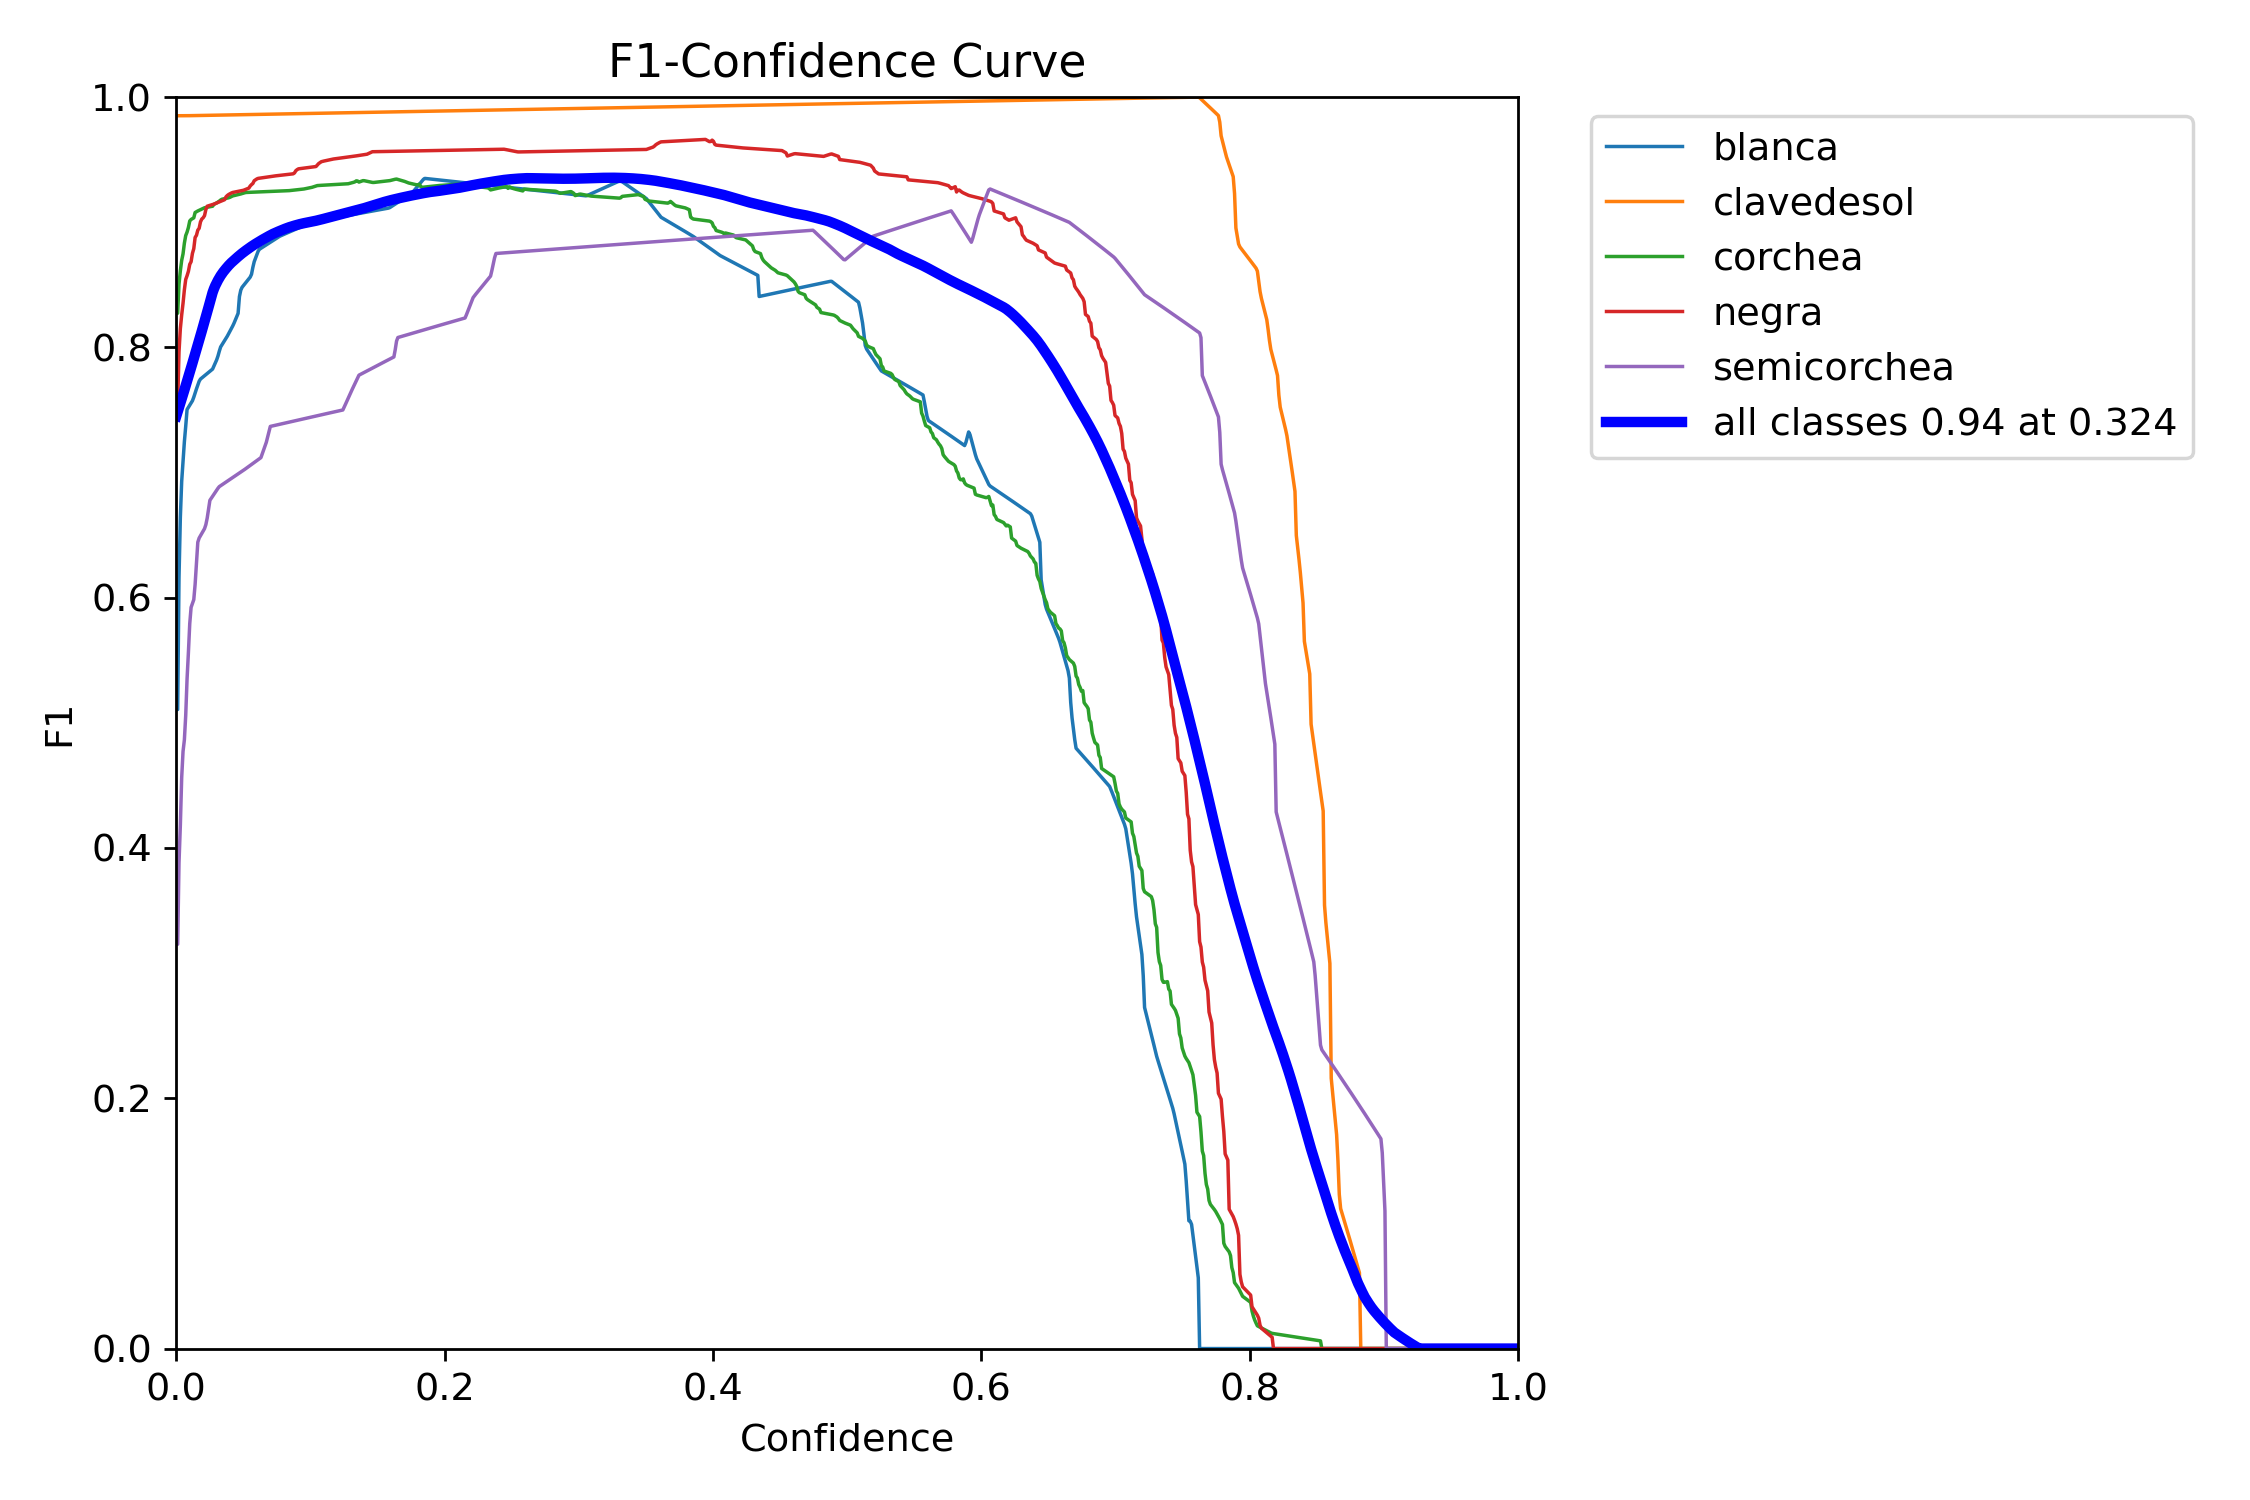

In [ ]:
Image(filename='/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/runs/detect/train/F1_curve.png', width=800)

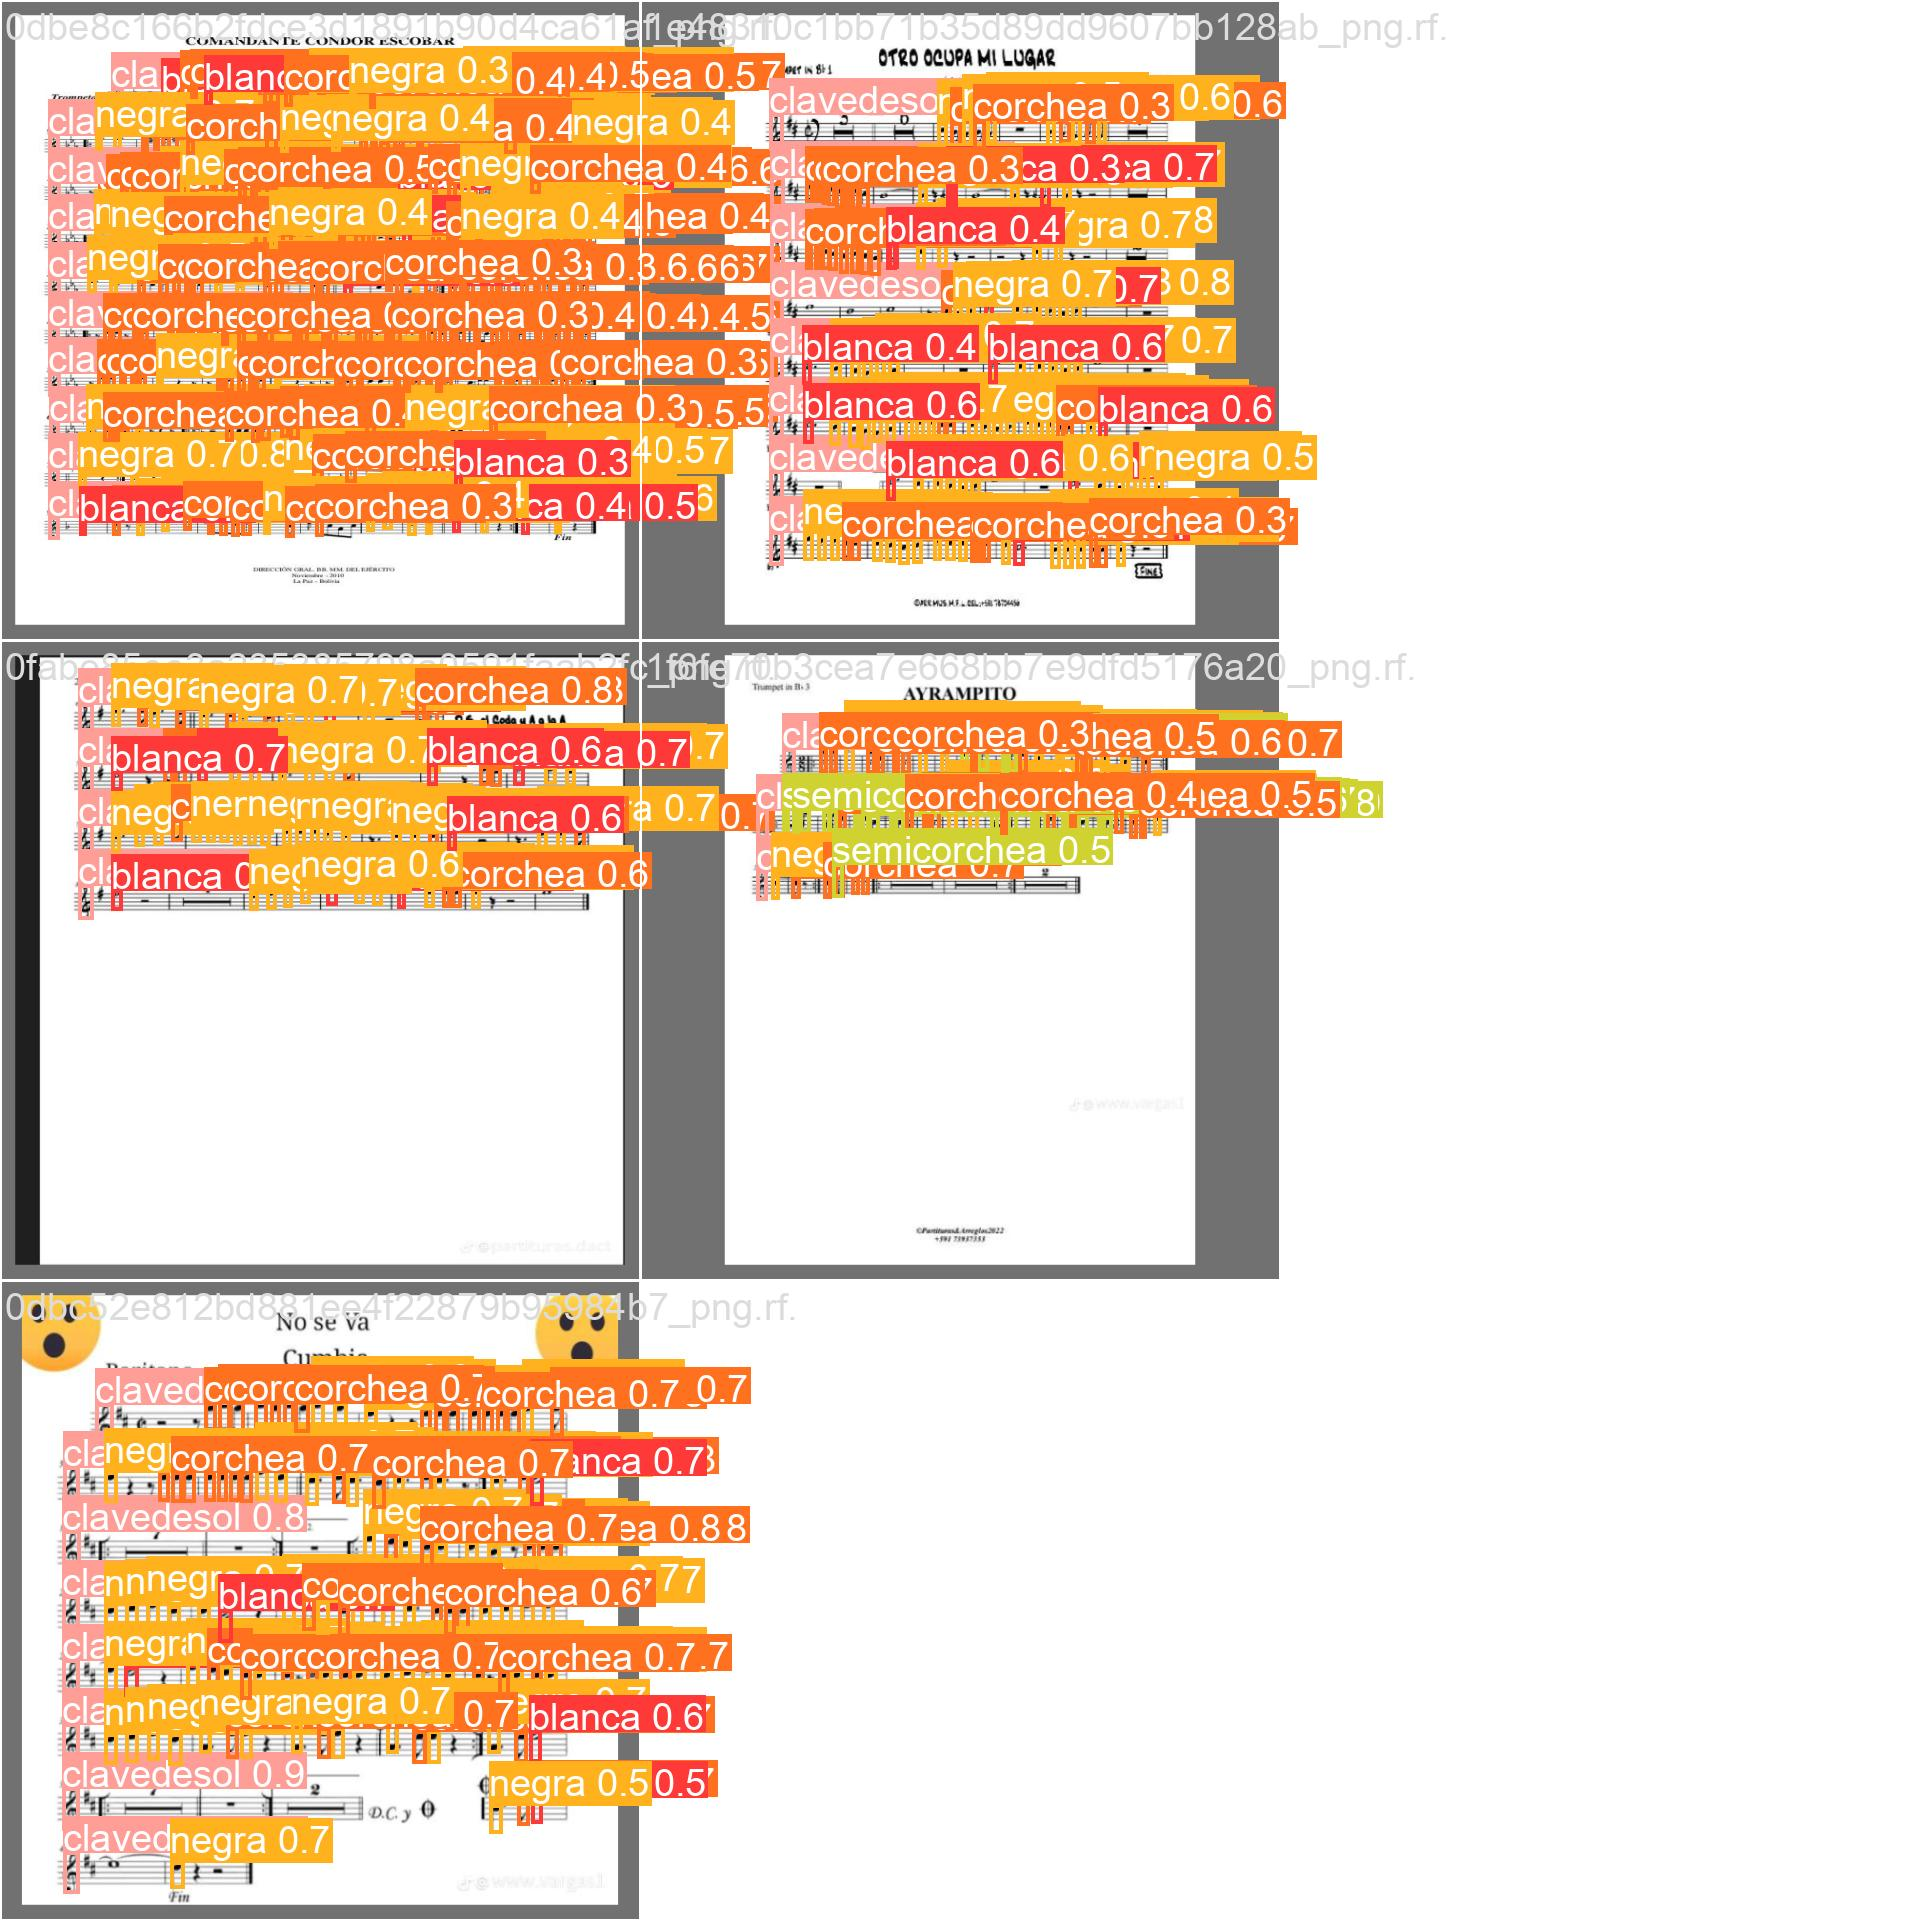

In [ ]:
Image(filename='/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/runs/detect/train/val_batch0_pred.jpg', width=800)

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/data.yaml

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/ProyectoFinal/partiturasmusicales/valid/labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100% 5/5 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 293, len(boxes) = 653. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.62s/it]
                   all          5        653      0.916      0.956      0.958      0.573
                blanca          4         37      0.898      0.949      0.928      0.464
            clavedesol          5         33      0.982          1      0.995      0.691
              

In [ ]:
import cv2
from IPython.display import Image
from ultralytics import YOLO

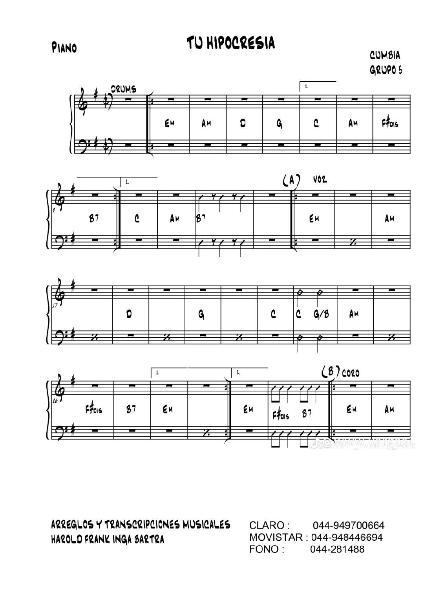

In [ ]:
import cv2
from IPython.display import Image
from ultralytics import YOLO
img_name='0739a53a74088b2f63ae2d4160dc81d7_png.rf.3a0d7449080a567145719347414ef6c5'
img =cv2.imread(f"/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/test/images/{img_name}.jpg")
# Mostrar la imagen en una ventana
Image(filename=f"/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/test/images/{img_name}.jpg", width=600)


0: 640x480 6 blancas, 4 clavedesols, 8 corcheas, 11 negras, 13.1ms
Speed: 1.9ms preprocess, 13.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


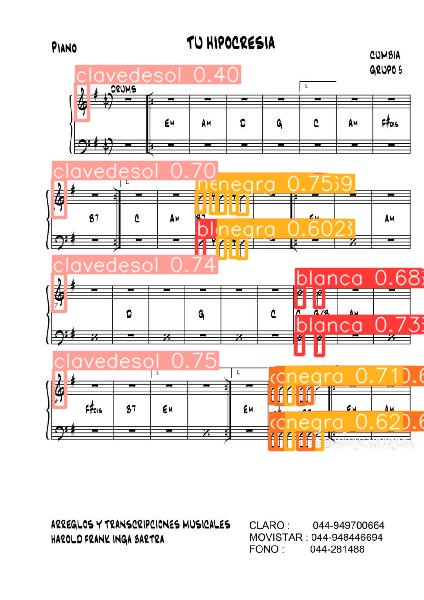

Class: negra, Bounding Box: (217, 192, 225, 213)
Class: clavedesol, Bounding Box: (53, 369, 65, 407)
Class: clavedesol, Bounding Box: (52, 273, 65, 311)
Class: blanca, Bounding Box: (295, 333, 303, 354)
Class: negra, Bounding Box: (285, 384, 293, 404)
Class: clavedesol, Bounding Box: (52, 179, 65, 217)
Class: negra, Bounding Box: (237, 192, 247, 214)
Class: corchea, Bounding Box: (304, 384, 312, 403)
Class: blanca, Bounding Box: (295, 286, 304, 307)
Class: blanca, Bounding Box: (315, 333, 323, 355)
Class: corchea, Bounding Box: (275, 384, 284, 404)
Class: negra, Bounding Box: (285, 430, 293, 449)
Class: corchea, Bounding Box: (304, 430, 313, 449)
Class: corchea, Bounding Box: (275, 430, 284, 449)
Class: negra, Bounding Box: (217, 237, 225, 258)
Class: blanca, Bounding Box: (314, 287, 323, 307)
Class: negra, Bounding Box: (230, 192, 237, 213)
Class: negra, Bounding Box: (196, 191, 204, 212)
Class: corchea, Bounding Box: (297, 385, 304, 404)
Class: blanca, Bounding Box: (196, 237, 204, 2

In [ ]:
from ultralytics import YOLO
import cv2
from PIL import Image

# Cargar el modelo YOLOv8
model = YOLO("/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/runs/detect/train/weights/best.pt")

# Cargar la imagen y hacer la predicción
img_path = "/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/test/images/0739a53a74088b2f63ae2d4160dc81d7_png.rf.3a0d7449080a567145719347414ef6c5.jpg"  # Cambia esto a la ruta de tu imagen
img = cv2.imread(img_path)
pred = model.predict(img)[0]

# Extracción de las predicciones
results = []
for detection in pred.boxes:
    class_id = int(detection.cls.item())  # Convertir el tensor a un entero
    class_name = model.names[class_id]
    x1, y1, x2, y2 = map(int, detection.xyxy[0].tolist())  # Convertir las coordenadas a una lista de enteros
    results.append({
        'class': class_name,
        'bounding_box': (x1, y1, x2, y2)
    })

# Guardar las predicciones visualizadas
pred_img = pred.plot()
output_img_path = f"/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/{img_name}.jpg"
cv2.imwrite(output_img_path, pred_img)

# Mostrar la imagen con las detecciones
display(Image.open(output_img_path))

# Imprimir resultados
for result in results:
    print(f"Class: {result['class']}, Bounding Box: {result['bounding_box']}")



0: 640x512 22 blancas, 11 clavedesols, 202 corcheas, 53 negras, 12 semicorcheas, 122.0ms
Speed: 2.6ms preprocess, 122.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 512)


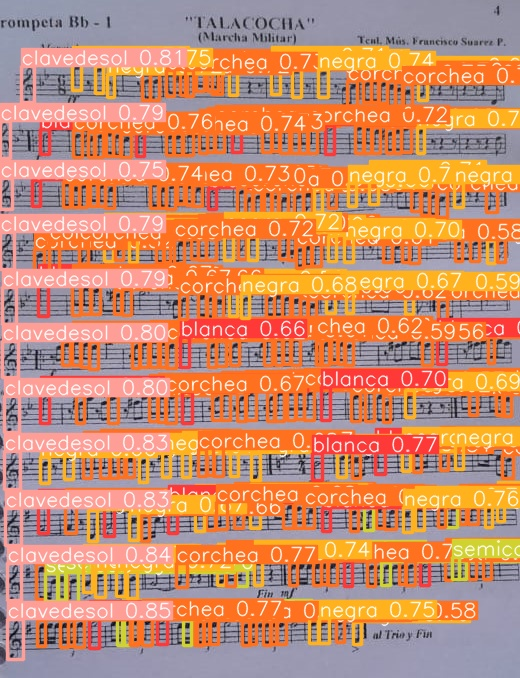

Class: clavedesol, Bounding Box: (7, 619, 23, 659)
Class: clavedesol, Bounding Box: (7, 563, 21, 600)
Class: clavedesol, Bounding Box: (5, 508, 21, 545)
Class: clavedesol, Bounding Box: (4, 451, 20, 489)
Class: clavedesol, Bounding Box: (21, 66, 34, 102)
Class: clavedesol, Bounding Box: (2, 341, 18, 377)
Class: clavedesol, Bounding Box: (4, 396, 19, 432)
Class: clavedesol, Bounding Box: (0, 121, 10, 158)
Class: clavedesol, Bounding Box: (2, 287, 16, 324)
Class: clavedesol, Bounding Box: (0, 232, 14, 269)
Class: semicorchea, Bounding Box: (452, 557, 459, 579)
Class: corchea, Bounding Box: (176, 563, 187, 587)
Class: blanca, Bounding Box: (312, 453, 322, 480)
Class: corchea, Bounding Box: (142, 617, 152, 645)
Class: corchea, Bounding Box: (402, 84, 412, 110)
Class: corchea, Bounding Box: (73, 130, 82, 157)
Class: negra, Bounding Box: (403, 507, 412, 532)
Class: corchea, Bounding Box: (74, 619, 84, 647)
Class: negra, Bounding Box: (95, 66, 103, 93)
Class: negra, Bounding Box: (319, 618, 3

In [ ]:
from ultralytics import YOLO
import cv2
from PIL import Image

# Cargar el modelo YOLOv8
model = YOLO("/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/runs/detect/train/weights/best.pt")

# Cargar la imagen y hacer la predicción
img_path = "/content/drive/MyDrive/ProyectoFinal/pa.jpg"  # Cambia esto a la ruta de tu imagen
img = cv2.imread(img_path)
pred = model.predict(img)[0]

# Extracción de las predicciones
results = []
for detection in pred.boxes:
    class_id = int(detection.cls.item())  # Convertir el tensor a un entero
    class_name = model.names[class_id]
    x1, y1, x2, y2 = map(int, detection.xyxy[0].tolist())  # Convertir las coordenadas a una lista de enteros
    results.append({
        'class': class_name,
        'bounding_box': (x1, y1, x2, y2)
    })

# Guardar las predicciones visualizadas
pred_img = pred.plot()
output_img_path = f"/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/{img_name}.jpg"
cv2.imwrite(output_img_path, pred_img)

# Mostrar la imagen con las detecciones
display(Image.open(output_img_path))

# Imprimir resultados
for result in results:
    print(f"Class: {result['class']}, Bounding Box: {result['bounding_box']}")


In [ ]:
!pip install opencv-python-headless
!pip install pillow
!pip install music21
!pip install reportlab

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


0: 640x512 22 blancas, 11 clavedesols, 202 corcheas, 53 negras, 12 semicorcheas, 126.0ms
Speed: 16.1ms preprocess, 126.0ms inference, 814.1ms postprocess per image at shape (1, 3, 640, 512)


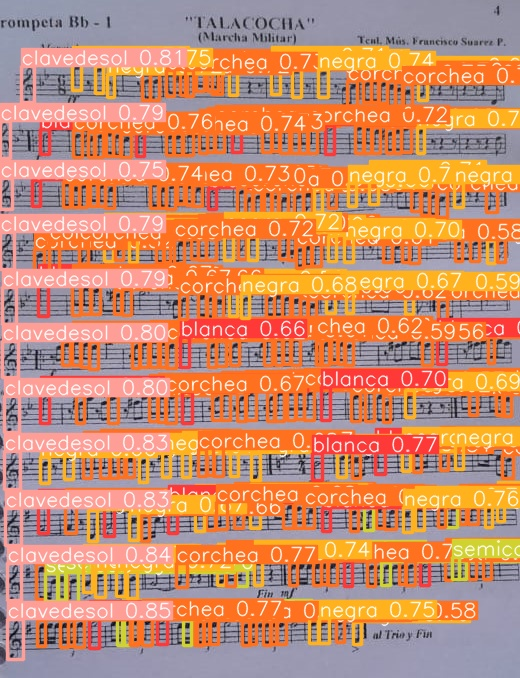

Class: clavedesol, Bounding Box: (7, 619, 23, 659)
Class: clavedesol, Bounding Box: (7, 563, 21, 600)
Class: clavedesol, Bounding Box: (5, 508, 21, 545)
Class: clavedesol, Bounding Box: (4, 451, 20, 489)
Class: clavedesol, Bounding Box: (21, 66, 34, 102)
Class: clavedesol, Bounding Box: (2, 341, 18, 377)
Class: clavedesol, Bounding Box: (4, 396, 19, 432)
Class: clavedesol, Bounding Box: (0, 121, 10, 158)
Class: clavedesol, Bounding Box: (2, 287, 16, 324)
Class: clavedesol, Bounding Box: (0, 232, 14, 269)
Class: semicorchea, Bounding Box: (452, 557, 459, 579)
Class: corchea, Bounding Box: (176, 563, 187, 587)
Class: blanca, Bounding Box: (312, 453, 322, 480)
Class: corchea, Bounding Box: (142, 617, 152, 645)
Class: corchea, Bounding Box: (402, 84, 412, 110)
Class: corchea, Bounding Box: (73, 130, 82, 157)
Class: negra, Bounding Box: (403, 507, 412, 532)
Class: corchea, Bounding Box: (74, 619, 84, 647)
Class: negra, Bounding Box: (95, 66, 103, 93)
Class: negra, Bounding Box: (319, 618, 3

/usr/local/lib/python3.10/dist-packages/music21/musicxml/m21ToXml.py:531: MusicXMLWarning: <music21.stream.Score 0x79dec0189420> is not well-formed; see isWellFormedNotation()
  warnings.warn(f'{sc} is not well-formed; see isWellFormedNotation()',


Image saved to /content/drive/MyDrive/ProyectoFinal/partiturasmusicales/output_image.jpg
MusicXML saved to /content/drive/MyDrive/ProyectoFinal/partiturasmusicales/output_music.xml
PDF saved to /content/drive/MyDrive/ProyectoFinal/partiturasmusicales/output_image.pdf


In [ ]:
from ultralytics import YOLO
import cv2
from PIL import Image, ImageDraw, ImageFont
import music21 as m21
from reportlab.pdfgen import canvas

# Cargar el modelo YOLOv8
model = YOLO("/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/runs/detect/train/weights/best.pt")

# Cargar la imagen y hacer la predicción
img_path = "/content/drive/MyDrive/ProyectoFinal/pa.jpg"  # Cambia esto a la ruta de tu imagen
img = cv2.imread(img_path)
pred = model.predict(img)[0]

# Extracción de las predicciones
results = []
for detection in pred.boxes:
    class_id = int(detection.cls.item())  # Convertir el tensor a un entero
    class_name = model.names[class_id]
    x1, y1, x2, y2 = map(int, detection.xyxy[0].tolist())  # Convertir las coordenadas a una lista de enteros
    results.append({
        'class': class_name,
        'bounding_box': (x1, y1, x2, y2)
    })

# Visualizar y guardar las predicciones
pred_img = pred.plot()
output_img_path = f"/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/output_image.jpg"
cv2.imwrite(output_img_path, pred_img)

# Mostrar la imagen con las detecciones
display(Image.open(output_img_path))

# Imprimir resultados
for result in results:
    print(f"Class: {result['class']}, Bounding Box: {result['bounding_box']}")

# Crear un archivo MusicXML
score = m21.stream.Score()

# Convertir detecciones a notas musicales
for result in results:
    note_type = result['class']
    if note_type == 'blanca':
        note = m21.note.Note(type='half')
    elif note_type == 'negra':
        note = m21.note.Note(type='quarter')
    elif note_type == 'corchea':
        note = m21.note.Note(type='eighth')
    elif note_type == 'semicorchea':
        note = m21.note.Note(type='16th')
    elif note_type == 'clavedesol':
        clef = m21.clef.TrebleClef()
        score.append(clef)
        continue
    else:
        continue

    # Aquí puedes agregar lógica adicional para determinar la altura de la nota
    note.pitch.midi = 60  # Central C (C4)
    score.append(note)

# Guardar el archivo MusicXML
output_musicxml_path = "/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/output_music.xml"
score.write('musicxml', fp=output_musicxml_path)

# Guardar la imagen en un PDF
pdf_path = "/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/output_image.pdf"
c = canvas.Canvas(pdf_path)
c.drawImage(output_img_path, 0, 0)
c.showPage()
c.save()

print(f"Image saved to {output_img_path}")
print(f"MusicXML saved to {output_musicxml_path}")
print(f"PDF saved to {pdf_path}")



0: 640x480 19 blancas, 9 clavedesols, 12.7ms
Speed: 1.8ms preprocess, 12.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


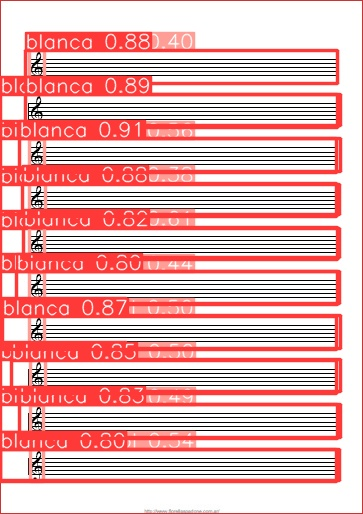

Class: blanca, Bounding Box: (19, 138, 336, 172)
Class: blanca, Bounding Box: (25, 94, 337, 127)
Class: blanca, Bounding Box: (25, 50, 337, 83)
Class: blanca, Bounding Box: (22, 183, 336, 216)
Class: blanca, Bounding Box: (2, 316, 336, 349)
Class: blanca, Bounding Box: (11, 360, 336, 393)
Class: blanca, Bounding Box: (19, 404, 337, 438)
Class: blanca, Bounding Box: (23, 227, 337, 259)
Class: blanca, Bounding Box: (16, 271, 337, 304)
Class: blanca, Bounding Box: (0, 449, 336, 481)
Class: blanca, Bounding Box: (0, 315, 340, 348)
Class: blanca, Bounding Box: (0, 94, 340, 125)
Class: blanca, Bounding Box: (0, 138, 340, 171)
Class: blanca, Bounding Box: (0, 359, 340, 391)
Class: blanca, Bounding Box: (0, 404, 340, 437)
Class: blanca, Bounding Box: (0, 184, 339, 214)
Class: blanca, Bounding Box: (0, 271, 339, 303)
Class: blanca, Bounding Box: (0, 449, 339, 480)
Class: clavedesol, Bounding Box: (29, 227, 44, 260)
Class: blanca, Bounding Box: (0, 228, 339, 257)
Class: clavedesol, Bounding Box:

In [ ]:
from ultralytics import YOLO
import cv2
from PIL import Image

# Cargar el modelo YOLOv8
model = YOLO("/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/runs/detect/train/weights/best.pt")

# Cargar la imagen y hacer la predicción
img_path = "/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/pentagramaC.jpg"  # Cambia esto a la ruta de tu imagen
img = cv2.imread(img_path)
pred = model.predict(img)[0]

# Extracción de las predicciones
results = []
for detection in pred.boxes:
    class_id = int(detection.cls.item())  # Convertir el tensor a un entero
    class_name = model.names[class_id]
    x1, y1, x2, y2 = map(int, detection.xyxy[0].tolist())  # Convertir las coordenadas a una lista de enteros
    results.append({
        'class': class_name,
        'bounding_box': (x1, y1, x2, y2)
    })

# Guardar las predicciones visualizadas
pred_img = pred.plot()
output_img_path = f"/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/salidasimagenesdetectadas/{img_name}.jpg"
cv2.imwrite(output_img_path, pred_img)

# Mostrar la imagen con las detecciones
display(Image.open(output_img_path))

# Imprimir resultados
for result in results:
    print(f"Class: {result['class']}, Bounding Box: {result['bounding_box']}")



0: 640x480 6 blancas, 13.5ms
Speed: 2.6ms preprocess, 13.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


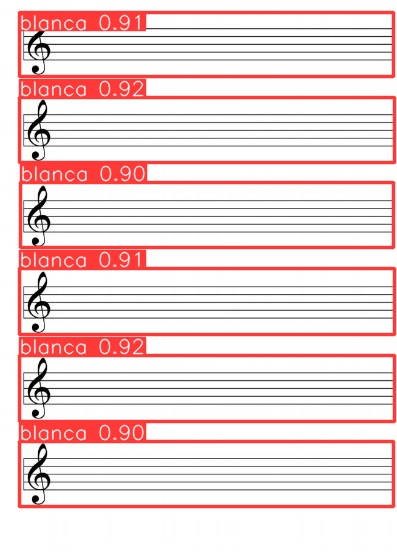

Class: blanca, Bounding Box: (19, 97, 394, 162)
Class: blanca, Bounding Box: (19, 355, 394, 421)
Class: blanca, Bounding Box: (19, 12, 393, 76)
Class: blanca, Bounding Box: (19, 268, 394, 334)
Class: blanca, Bounding Box: (20, 182, 393, 247)
Class: blanca, Bounding Box: (19, 441, 393, 506)
Image saved to /content/drive/MyDrive/ProyectoFinal/partiturasmusicales/salidasimagenesdetectadas/output_image.jpg
MusicXML saved to /content/drive/MyDrive/ProyectoFinal/partiturasmusicales/salidasimagenesdetectadas/output_music.xml
PDF saved to /content/drive/MyDrive/ProyectoFinal/partiturasmusicales/salidasimagenesdetectadas/output_image.pdf


/usr/local/lib/python3.10/dist-packages/music21/musicxml/m21ToXml.py:531: MusicXMLWarning: <music21.stream.Score 0x79deadf0dea0> is not well-formed; see isWellFormedNotation()
  warnings.warn(f'{sc} is not well-formed; see isWellFormedNotation()',


In [ ]:
from ultralytics import YOLO
import cv2
from PIL import Image, ImageDraw, ImageFont
import music21 as m21
from reportlab.pdfgen import canvas

# Cargar el modelo YOLOv8
model = YOLO("/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/runs/detect/train/weights/best.pt")

# Cargar la imagen y hacer la predicción
img_path = "/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/clavedesol.jpg"  # Cambia esto a la ruta de tu imagen
img = cv2.imread(img_path)
pred = model.predict(img)[0]

# Extracción de las predicciones
results = []
for detection in pred.boxes:
    class_id = int(detection.cls.item())  # Convertir el tensor a un entero
    class_name = model.names[class_id]
    x1, y1, x2, y2 = map(int, detection.xyxy[0].tolist())  # Convertir las coordenadas a una lista de enteros
    results.append({
        'class': class_name,
        'bounding_box': (x1, y1, x2, y2)
    })

# Visualizar y guardar las predicciones
pred_img = pred.plot()
output_img_path = f"/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/salidasimagenesdetectadas/output_image.jpg"
cv2.imwrite(output_img_path, pred_img)

# Mostrar la imagen con las detecciones
display(Image.open(output_img_path))

# Imprimir resultados
for result in results:
    print(f"Class: {result['class']}, Bounding Box: {result['bounding_box']}")

# Crear un archivo MusicXML
score = m21.stream.Score()

# Convertir detecciones a notas musicales
for result in results:
    note_type = result['class']
    if note_type == 'blanca':
        note = m21.note.Note(type='half')
    elif note_type == 'negra':
        note = m21.note.Note(type='quarter')
    elif note_type == 'corchea':
        note = m21.note.Note(type='eighth')
    elif note_type == 'semicorchea':
        note = m21.note.Note(type='16th')
    elif note_type == 'clavedesol':
        clef = m21.clef.TrebleClef()
        score.append(clef)
        continue
    else:
        continue

    # Aquí puedes agregar lógica adicional para determinar la altura de la nota
    note.pitch.midi = 60  # Central C (C4)
    score.append(note)

# Guardar el archivo MusicXML
output_musicxml_path = "/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/salidasimagenesdetectadas/output_music.xml"
score.write('musicxml', fp=output_musicxml_path)

# Guardar la imagen en un PDF
pdf_path = "/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/salidasimagenesdetectadas/output_image.pdf"
c = canvas.Canvas(pdf_path)
c.drawImage(output_img_path, 0, 0)
c.showPage()
c.save()

print(f"Image saved to {output_img_path}")
print(f"MusicXML saved to {output_musicxml_path}")
print(f"PDF saved to {pdf_path}")


In [ ]:
# Función para determinar la posición de la nota en el pentagrama
def get_note_position(y, staff_lines):
    """
    Determina la posición de la nota basada en la coordenada y y las líneas del pentagrama.

    :param y: La coordenada y del bounding box de la nota.
    :param staff_lines: Las coordenadas y de las líneas del pentagrama.
    :return: La nota correspondiente.
    """
    note_names = ['F', 'E', 'D', 'C', 'B', 'A', 'G', 'F', 'E', 'D', 'C', 'B', 'A', 'G', 'F', 'E']  # Ajustado para más octavas
    staff_line_spacing = staff_lines[1] - staff_lines[0]

    # Determinar en qué línea o espacio está la nota
    line_index = (y - staff_lines[0]) // (staff_line_spacing / 2)

    if line_index < 0 or line_index >= len(note_names):
        return None  # Fuera del rango del pentagrama

    return note_names[int(line_index)]

# Suposición de las posiciones y de las líneas del pentagrama
staff_lines = [100, 120, 140, 160, 180]

# Lista para almacenar los elementos detectados con sus posiciones
detected_elements = []

for result in results:
    x1, y1, x2, y2 = result['bounding_box']
    center_y = (y1 + y2) // 2  # Coordenada y central de la nota
    note = get_note_position(center_y, staff_lines)

    if note:
        detected_elements.append({
            'step': note,
            'octave': 4,  # Puedes ajustar esto según la posición real de la nota
            'duration': 1,  # Ajusta esto según la duración real
            'type': result['class']  # Aquí puedes mapear las clases a los tipos de notas en MusicXML
        })

# Mostrar los elementos detectados con sus posiciones en el pentagrama
for element in detected_elements:
    print(element)


In [ ]:
!yolo export model='/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/runs/detect/train/weights/best.pt' format=tflite imgsz=640

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/ProyectoFinal/partiturasmusicales/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (21.5 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnx2tf>1.17.5,<=1.22.3', 'sng4onnx>=1.0.1', 'onnxslim==0.1.28', 'onnx_graphsurgeon>=0.3.26', 'tflite_support', 'onnxruntime'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 292.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 209.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 199.3 MB/s eta 0:00:00
     ━━━━━━

In [ ]:
!pip install pillow fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40702 sha256=f862de0929f2d2445b06f99d202afee480fa74145b2711b8ec02248a66995b9f
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf


In [ ]:

from PIL import Image, ImageEnhance
from fpdf import FPDF



# 2. Ruta de la imagen y del PDF
image_path = '/content/drive/MyDrive/ProyectoFinal/pa.jpg'
pdf_path = '/content/drive/MyDrive/ProyectoFinal/pa_clara.pdf'

# 3. Leer la imagen
image = Image.open(image_path)

# 4. Aumentar el brillo de la imagen
enhancer = ImageEnhance.Brightness(image)
bright_image = enhancer.enhance(1.5)  # Aumentar el brillo en un 50%

# 5. Guardar la imagen modificada como un PDF
bright_image.save('/content/bright_pa.jpg')  # Guardar temporalmente como imagen

# Crear un PDF con la imagen clara
pdf = FPDF()
pdf.add_page()
pdf.image('/content/bright_pa.jpg', x=10, y=10, w=190)  # Ajustar según sea necesario

# Guardar el PDF en la ruta especificada
pdf.output(pdf_path, "F")

print(f'El PDF ha sido guardado en: {pdf_path}')


El PDF ha sido guardado en: /content/drive/MyDrive/ProyectoFinal/pa_clara.pdf
